<a href="https://colab.research.google.com/github/Anugyak/LGM-/blob/main/Preprocessing_of_Traveler_Trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import FunctionTransformer

# Loading the dataset

In [2]:
df = pd.read_csv('/content/updatedreeee.csv')

In [3]:
df.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7,John Smith,35,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5,Jane Doe,28,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7,David Lee,45,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14,Sarah Johnson,29,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700,Train,200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Trip ID               137 non-null    int64 
 1   Destination           137 non-null    object
 2   Start date            137 non-null    object
 3   End date              137 non-null    object
 4   Duration (days)       137 non-null    int64 
 5   Traveler name         137 non-null    object
 6   Traveler age          137 non-null    int64 
 7   Traveler gender       137 non-null    object
 8   Traveler nationality  137 non-null    object
 9   Accommodation type    137 non-null    object
 10  Accommodation cost    137 non-null    object
 11  Transportation type   136 non-null    object
 12  Transportation cost   136 non-null    object
dtypes: int64(3), object(10)
memory usage: 14.0+ KB


In [5]:
df.columns

Index(['Trip ID', 'Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost'],
      dtype='object')

In [6]:
df.nunique()

Trip ID                 137
Destination              45
Start date              111
End date                125
Duration (days)           9
Traveler name           109
Traveler age             29
Traveler gender           2
Traveler nationality     41
Accommodation type        8
Accommodation cost       53
Transportation type       9
Transportation cost      48
dtype: int64

In [7]:
df.drop(['Trip ID', 'Traveler name'], axis=1, inplace=True)

In [8]:

df.columns

Index(['Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler age', 'Traveler gender', 'Traveler nationality',
       'Accommodation type', 'Accommodation cost', 'Transportation type',
       'Transportation cost'],
      dtype='object')

# Spliting destination into city and country

In [9]:
df['Destination'].value_counts()

Paris, France                  14
Bali, Indonesia                12
Tokyo, Japan                   12
Rome, Italy                     9
New York, USA                   8
Sydney, Australia               8
Bangkok, Thailand               7
London, UK                      7
Barcelona, Spain                6
Rio de Janeiro, Brazil          5
Cancun, Mexico                  4
Cape Town, South Africa         3
Sydney, Aus                     3
Amsterdam, Netherlands          3
Vancouver, Canada               2
Seoul, South Korea              2
Phuket, Thailand                2
, Dubai                         2
New York City, USA              2
Bangkok, Thai                   1
Phuket, Thai                    1
Cape Town, SA                   1
, Canada                        1
Santorini, Greece               1
Los Angeles, USA                1
Phnom Penh, Cambodia            1
Sydney, AUS                     1
Athens, Greece                  1
, Australia                     1
, Spain       

In [10]:
df['Destination'].unique()

array(['London, UK', 'Phuket, Thailand', 'Bali, Indonesia',
       'New York, USA', 'Tokyo, Japan', 'Paris, France',
       'Sydney, Australia', 'Rio de Janeiro, Brazil',
       'Amsterdam, Netherlands', 'Dubai, United Arab Emirates',
       'Cancun, Mexico', 'Barcelona, Spain', 'Honolulu, Hawaii',
       'Berlin, Germany', 'Marrakech, Morocco', 'Edinburgh, Scotland',
       'Rome, Italy', 'Bangkok, Thailand', 'Hawaii, USA', ', Japan',
       ', Thailand', ', France', ', Australia', ', Brazil', ', Greece',
       ', Egypt', ', Mexico', ', Italy', ', Spain', ', Canada',
       'New York City, USA', 'Vancouver, Canada', 'Sydney, AUS',
       'Seoul, South Korea', 'Los Angeles, USA',
       'Cape Town, South Africa', 'Cape Town, SA', 'Sydney, Aus',
       'Bangkok, Thai', 'Phuket, Thai', ', Dubai', 'Santorini, Greece',
       'Phnom Penh, Cambodia', 'Athens, Greece', 'Auckland, New Zealand'],
      dtype=object)

## Creating the City and Country columns
If the Destination column has a single value then null is assigned to the city and that value is assigned to the Country Column

In [11]:
df[['City', 'Country']] = df['Destination'].str.split(',', expand=True)
df.loc[df['City'] == '', 'City'] = np.NaN
df.drop(columns = ['Destination'],inplace = True)

In [12]:
df

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
0,5/1/2023,5/8/2023,7,35,Male,American,Hotel,1200,Flight,600,London,UK
1,6/15/2023,6/20/2023,5,28,Female,Canadian,Resort,800,Flight,500,Phuket,Thailand
2,7/1/2023,7/8/2023,7,45,Male,Korean,Villa,1000,Flight,700,Bali,Indonesia
3,8/15/2023,8/29/2023,14,29,Female,British,Hotel,2000,Flight,1000,New York,USA
4,9/10/2023,9/17/2023,7,26,Female,Vietnamese,Airbnb,700,Train,200,Tokyo,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...
132,8/1/2023,8/10/2023,9,37,Male,Brazilian,Hostel,2500,Car,2000,Rio de Janeiro,Brazil
133,8/15/2023,8/21/2023,6,29,Female,Canadian,Hotel,5000,Airplane,3000,Vancouver,Canada
134,9/1/2023,9/8/2023,7,34,Male,Chinese,Hostel,2000,Train,1000,Bangkok,Thailand
135,9/15/2023,9/22/2023,7,25,Female,Spanish,Airbnb,6000,Airplane,2500,Barcelona,Spain


In [13]:
df['Country'].nunique()

29

In [14]:
df['Country'].value_counts()

 France                  15
 Japan                   13
 Indonesia               12
 USA                     12
 Italy                   10
 Thailand                10
 Australia                9
 UK                       7
 Spain                    7
 Brazil                   6
 Mexico                   5
 Aus                      3
 Netherlands              3
 Greece                   3
 Canada                   3
 South Africa             3
 South Korea              2
 Dubai                    2
 Thai                     2
 Cambodia                 1
 SA                       1
 Morocco                  1
 AUS                      1
 Egypt                    1
 Scotland                 1
 Germany                  1
 Hawaii                   1
 United Arab Emirates     1
 New Zealand              1
Name: Country, dtype: int64

# Handling the missing values in city column

In [20]:
def fill(df):
  """
  this function works on handling the missing value in the City column created from the destination column from the original dataset
  input parameter: dataframe
  return: returns dataframe that contains the filled value using mode
  """
  g = df.groupby('Country')['City'].agg(pd.Series.mode).reset_index()
  df['City'] = df['City'].fillna(df['Country'].map(g.set_index('Country')['City']))
  return df

df = fill(df)

ValueError: ignored

In [16]:
df.iloc[[29]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
29,7/2/2022,7/11/2022,9,25,Male,Korean,Airbnb,$600,Car rental,$300,Paris,France


In [ ]:
g = df.groupby('Country')['City'].agg(pd.Series.mode).reset_index()
df['City'] = df['City'].fillna(df['Country'].map(g.set_index('Country')['City']))

ValueError: ignored

In [21]:
df

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
0,5/1/2023,5/8/2023,7,35,Male,American,Hotel,1200,Flight,600,London,UK
1,6/15/2023,6/20/2023,5,28,Female,Canadian,Resort,800,Flight,500,Phuket,Thailand
2,7/1/2023,7/8/2023,7,45,Male,Korean,Villa,1000,Flight,700,Bali,Indonesia
3,8/15/2023,8/29/2023,14,29,Female,British,Hotel,2000,Flight,1000,New York,USA
4,9/10/2023,9/17/2023,7,26,Female,Vietnamese,Airbnb,700,Train,200,Tokyo,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...
132,8/1/2023,8/10/2023,9,37,Male,Brazilian,Hostel,2500,Car,2000,Rio de Janeiro,Brazil
133,8/15/2023,8/21/2023,6,29,Female,Canadian,Hotel,5000,Flight,3000,Vancouver,Canada
134,9/1/2023,9/8/2023,7,34,Male,Chinese,Hostel,2000,Train,1000,Bangkok,Thailand
135,9/15/2023,9/22/2023,7,25,Female,Spanish,Airbnb,6000,Flight,2500,Barcelona,Spain


In [22]:
df.iloc[[28]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
28,6/15/2022,6/22/2022,7,45,Male,Canadian,Hostel,$200,Train,$150,Bangkok,Thailand


# Replacing the values of Transportation type
## Airplane and Plane into **Flight**

In [23]:
def transportation_type(column):
  """
  function to make the uniform value in transportation type column
  input arguments:transportation type column
  return: the column with updated transportation type value
  """
  column.replace({"Plane": "Flight", "Airplane": "Flight"}, inplace=True)
  return column
df['Transportation type']=transportation_type(df['Transportation type'])

In [24]:
df.sample(10)

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
112,7/15/2022,7/22/2022,7,27,Male,Greece,Airbnb,1000,Ferry,150,Santorini,Greece
102,7/22/2024,7/28/2024,6,29,Female,South Korea,Villa,"$1,200",Flight,"$1,000",Bali,Indonesia
60,7/12/2022,7/18/2022,6,35,Female,American,Hotel,1200,Flight,800,Paris,France
92,5/1/2022,5/10/2022,10,27,Female,Korean,Hotel,800 USD,Train,150 USD,Seoul,South Korea
30,8/20/2022,9/2/2022,13,28,Female,British,Hotel,"$1,000",Car rental,$500,Sydney,Australia
117,5/1/2022,5/12/2022,11,26,Female,Chinese,Airbnb,800,Flight,1000,Sydney,Aus
39,1/2/2023,1/9/2023,7,33,Male,Canadian,Airbnb,800,Train,150,Sydney,Australia
45,9/15/2022,9/22/2022,7,41,Male,American,Hotel,1500,Flight,500,New York City,USA
32,10/12/2022,10/20/2022,8,20,Male,American,Airbnb,$400,Flight,$600,"[Athens, Santorini]",Greece
9,3/10/2024,3/17/2024,7,39,Male,Emirati,Resort,2500,Flight,800,Dubai,United Arab Emirates


In [25]:
df.iloc[[126]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
126,5/1/2023,5/7/2023,6,35,Male,American,Hotel,5000,Flight,2500,Paris,France


In [26]:
df.shape

(137, 12)

# Removing $ and USD from the cost column
## i.e. Transportation cost and Accommodation cost

In [27]:
def cost_col(column):
    """
    function to remove all $ and USD present in transportation and accommodation cost
    input parameter: transportation cost and accommodation cost column
    return: only numeric value removing all $ and USD
    """
    pattern = r'([^\d]+)'
    return column.str.replace(pattern, '')
    #return column.apply(lambda x: x.str.replace(pattern, ''))

df['Transportation cost']=cost_col(df['Transportation cost'])
df['Accommodation cost']=cost_col(df['Accommodation cost'])

<ipython-input-27-7b0ebd6f1016>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  return column.str.replace(pattern, '')


In [28]:
df.sample(10)

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
3,8/15/2023,8/29/2023,14,29,Female,British,Hotel,2000,Flight,1000,New York,USA
74,6/7/2023,6/14/2023,7,46,Male,British,Hotel,1200,Flight,700,Paris,France
26,10/20/2023,10/28/2023,8,31,Female,Spanish,Hotel,1100,Train,150,Barcelona,Spain
18,7/22/2023,7/28/2023,6,35,Female,British,Hotel,1200,Train,150,London,UK
58,6/20/2024,6/27/2024,7,26,Male,Chinese,Hotel,1200,Car rental,300,Los Angeles,USA
125,2/10/2023,2/18/2023,8,33,Female,Canadian,Hotel,800,Flight,800,Bali,Indonesia
73,4/15/2023,4/22/2023,7,42,Female,Mexican,Resort,800,Flight,500,Cancun,Mexico
136,10/1/2023,10/8/2023,7,39,Male,New Zealander,Hotel,7000,Train,2500,Auckland,New Zealand
36,3/23/2023,3/31/2023,8,27,Male,Korean,Hotel,900,Car rental,400,Barcelona,Spain
38,6/12/2022,6/19/2022,7,25,Female,American,Hotel,1400,Flight,600,Paris,France


In [29]:
df.iloc[[57]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
57,5/10/2024,5/18/2024,8,27,Male,South Korean,Hostel,500,Subway,20,Seoul,South Korea


## Renaming the column

In [30]:
df.rename(columns = {'Transportation cost':'Transportation cost in dollar', 'Accommodation cost':'Accommodation cost in dollar'}, inplace = True)
df.sample(5)

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
37,4/19/2023,4/26/2023,7,38,Female,Australian,Airbnb,350,Bus,75,Vancouver,Canada
73,4/15/2023,4/22/2023,7,42,Female,Mexican,Resort,800,Flight,500,Cancun,Mexico
7,1/5/2024,1/12/2024,7,25,Male,Brazilian,Airbnb,900,Flight,600,Rio de Janeiro,Brazil
35,2/14/2023,2/20/2023,6,31,Female,American,Hostel,180,Train,120,Rome,Italy
87,11/20/2021,11/30/2021,11,29,Male,British,Hostel,300,Flight,400,London,UK


# Changing the irrelevant nationality value into appropriate ones in Traveler nationality column

In [31]:
df['Traveler nationality'].value_counts()

American                24
Korean                  13
British                 12
Canadian                 9
Australian               8
Spanish                  7
Chinese                  7
Italian                  4
Brazilian                4
Indian                   4
Vietnamese               3
South Korea              3
South Korean             3
Taiwan                   2
Canada                   2
USA                      2
South African            2
Japanese                 2
Mexican                  2
Emirati                  2
Dutch                    2
Brazil                   1
Cambodia                 1
United Arab Emirates     1
Greece                   1
Italy                    1
Singapore                1
United Kingdom           1
Hong Kong                1
Germany                  1
Japan                    1
Spain                    1
Scottish                 1
China                    1
UK                       1
German                   1
Indonesian               1
T

In [32]:
def nationality(col):
    """
    function to make uniform values for nationality
    input parameter: Traveler nationality column
    Return: Uniformed values for nationality in traveler nationality column
    """
    col = col.replace(['Canada', 'UK', 'USA', 'South Korea', 'Spain' 'South Korean', 'United Kingdom', 'Hong Kong', 'Italy', 'China', 'Taiwan', 'Japan', 'United Arab Emirates', 'Brazil', 'Greece', 'Singapore', 'Germany'],
     ['Canadian', 'British','American', 'Korean', 'Spanish' 'Korean', 'British', 'Chinese', 'Italian', 'Chinese', 'Taiwanese', 'Japanese', 'Emirati', 'Brazilian', 'Greek', 'Singaporean', 'German'])
    return col

df['Traveler nationality'] = nationality(df['Traveler nationality'])

In [33]:
df.iloc[[103]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
103,10/10/2024,10/17/2024,7,41,Male,German,Hotel,600,Train,150,Amsterdam,Netherlands


# Making the country names uniform in Country column

In [34]:
df.loc[df['Country']=='Thai','Country']='Thailand'
df.loc[df['Country']=='SA','Country']='South Africa'
df.loc[(df['Country']=='Aus')|(df['Country']=='AUS'),'Country']='Australia'
df.iloc[[80]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
80,1/1/2025,1/8/2025,7,32,Female,British,Resort,700,Flight,800,Phuket,Thai


In [ ]:
df.loc[df['Country'] == 'SA', 'Country'] = 'South Africa'
df.loc[df['Country'] == 'Thai', 'Country'] = 'Thailand'
df.iloc[[75]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
75,9/1/2023,9/10/2023,9,31,Male,South African,Guesthouse,400,Car,300,Cape Town,SA


In [ ]:
new_df = df['Country'].replace('SA', 'South Africa')
new_df.iloc[[75]]


75     SA
Name: Country, dtype: object

In [ ]:
for index, row in df.iterrows():
    if row['Country'] == 'SA':
        df.loc[index, 'Country'] = 'South Africa'

df.iloc[[75]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
75,9/1/2023,9/10/2023,9,31,Male,South African,Guesthouse,400,Car,300,Cape Town,SA


In [ ]:
df.loc[df['Country'] == 'SA', 'Country'] = 'South Africa'
df[df.index == 75]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
75,9/1/2023,9/10/2023,9,31,Male,South African,Guesthouse,400,Car,300,Cape Town,SA


In [ ]:
df.replace({'Country':{'SA':'South Africa'}}, inplace = True)
df.iloc[[75]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
75,9/1/2023,9/10/2023,9,31,Male,South African,Guesthouse,400,Car,300,Cape Town,SA


In [ ]:
df['Country']=df['Country'].replace(to_replace='Thai', value='Thailand')
df.iloc[[80]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
80,1/1/2025,1/8/2025,7,32,Female,British,Resort,700,Flight,800,Phuket,Thai


In [ ]:
df['Country'] = df['Country'].replace(['Thai'], 'Thailand')
df.iloc[[80]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
80,1/1/2025,1/8/2025,7,32,Female,British,Resort,700,Flight,800,Phuket,Thai


In [ ]:
def country_name(col):
    col = col.replace(['Aus', 'Thai', 'SA'], ['Australia', 'Thailand', 'South Africa'])
    return col

df['Country'] = country_name(df['Country'])

In [ ]:
df.iloc[[75]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
75,9/1/2023,9/10/2023,9,31,Male,South African,Guesthouse,400,Car,300,Cape Town,SA


In [ ]:
df.replace({'Country':{'Aus':'Australia'}})

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
0,5/1/2023,5/8/2023,7,35,Male,American,Hotel,1200,Flight,600,London,UK
1,6/15/2023,6/20/2023,5,28,Female,Canadian,Resort,800,Flight,500,Phuket,Thailand
2,7/1/2023,7/8/2023,7,45,Male,Korean,Villa,1000,Flight,700,Bali,Indonesia
3,8/15/2023,8/29/2023,14,29,Female,British,Hotel,2000,Flight,1000,New York,USA
4,9/10/2023,9/17/2023,7,26,Female,Vietnamese,Airbnb,700,Train,200,Tokyo,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...
132,8/1/2023,8/10/2023,9,37,Male,Brazilian,Hostel,2500,Car,2000,Rio de Janeiro,Brazil
133,8/15/2023,8/21/2023,6,29,Female,Canadian,Hotel,5000,Flight,3000,Vancouver,Canada
134,9/1/2023,9/8/2023,7,34,Male,Chinese,Hostel,2000,Train,1000,Bangkok,Thailand
135,9/15/2023,9/22/2023,7,25,Female,Spanish,Airbnb,6000,Flight,2500,Barcelona,Spain


In [ ]:
df['Country'] = df['Country'].replace(['Aus'], 'Australia')

In [ ]:
df.iloc[[117]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
117,5/1/2022,5/12/2022,11,26,Female,Chinese,Airbnb,800,Flight,1000,Sydney,Aus


In [ ]:
df['Traveler nationality'] = df['Traveler nationality'].replace(['Canada'], 'Canadian')

In [ ]:
df['Traveler nationality'] = df['Traveler nationality'].replace(['Canada', 'UK','USA'], ['Canadian', 'British','American'])

In [ ]:
df.iloc[[93]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
93,6/15/2022,6/20/2022,5,35,Male,American,Hotel,500,Flight,800,Paris,France


In [ ]:
df.loc[ df["Country"] == "Aus", "Country"] = "Australia"
df.iloc[[117]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
117,5/1/2022,5/12/2022,11,26,Female,Chinese,Airbnb,800,Flight,1000,Sydney,Aus


In [ ]:
df['Country'] = df['Country'].replace(["SA",  "South Africa"],["Aus", "Australia"])
df

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
0,5/1/2023,5/8/2023,7,35,Male,American,Hotel,1200,Flight,600,London,UK
1,6/15/2023,6/20/2023,5,28,Female,Canadian,Resort,800,Flight,500,Phuket,Thailand
2,7/1/2023,7/8/2023,7,45,Male,Korean,Villa,1000,Flight,700,Bali,Indonesia
3,8/15/2023,8/29/2023,14,29,Female,British,Hotel,2000,Flight,1000,New York,USA
4,9/10/2023,9/17/2023,7,26,Female,Vietnamese,Airbnb,700,Train,200,Tokyo,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...
132,8/1/2023,8/10/2023,9,37,Male,Brazilian,Hostel,2500,Car,2000,Rio de Janeiro,Brazil
133,8/15/2023,8/21/2023,6,29,Female,Canadian,Hotel,5000,Flight,3000,Vancouver,Canada
134,9/1/2023,9/8/2023,7,34,Male,Chinese,Hostel,2000,Train,1000,Bangkok,Thailand
135,9/15/2023,9/22/2023,7,25,Female,Spanish,Airbnb,6000,Flight,2500,Barcelona,Spain


In [ ]:
df.iloc[[117]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
117,5/1/2022,5/12/2022,11,26,Female,Chinese,Airbnb,800,Flight,1000,Sydney,Aus


# Date and time

In [35]:
df[['Start date','End date']]=df[['Start date','End date']].apply(pd.to_datetime)
df['Day of the week']=df['Start date'].dt.day_name()
df['Month']=df['Start date'].dt.month_name()

In [36]:
df.sample(5)

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country,Day of the week,Month
19,2023-10-05,2023-10-15,10,45,Male,Japanese,Hotel,1200,Flight,800,Tokyo,Japan,Thursday,October
55,2024-03-15,2024-03-23,8,35,Male,British,Hotel,1000,Train,200,London,UK,Friday,March
125,2023-02-10,2023-02-18,8,33,Female,Canadian,Hotel,800,Flight,800,Bali,Indonesia,Friday,February
52,2023-12-24,2023-12-31,7,28,Female,Canadian,Hotel,1400,Flight,800,New York,USA,Sunday,December
68,2024-09-08,2024-09-16,8,33,Female,Indian,Hostel,300,Flight,700,Bangkok,Thailand,Sunday,September


# Visualization


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Visualization of Accommodation type

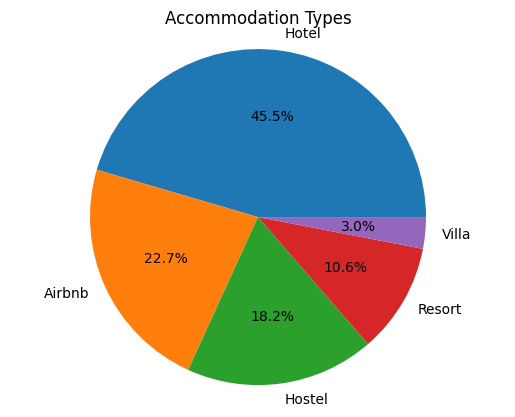

In [38]:
accomodations_counts = df['Accommodation type'].value_counts()[:5]

labels = accomodations_counts.index.tolist()
sizes = accomodations_counts.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Accommodation Types')
plt.show()

### Visualization of transportation type

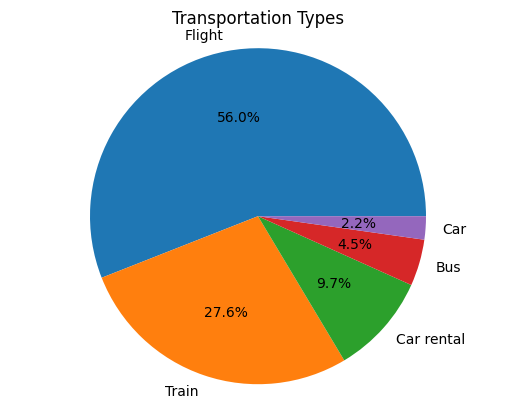

In [39]:
accomodations_counts = df['Transportation type'].value_counts()[:5]

labels = accomodations_counts.index.tolist()
sizes = accomodations_counts.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Transportation Types')
plt.show()

### plot showing count of traveler according to their age

<Figure size 600x400 with 0 Axes>

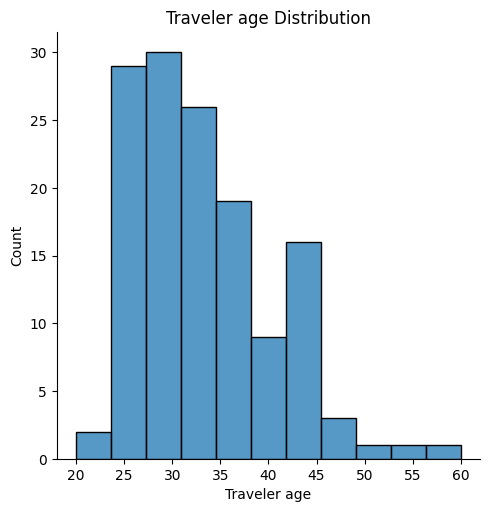

In [40]:
plt.figure(figsize=(6,4))
sns.displot(x=df['Traveler age']);
plt.xlabel('Traveler age')
plt.title('Traveler age Distribution')
sns.despine();

### Plot showing count of Nationality

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'American'),
  Text(1, 0, 'Canadian'),
  Text(2, 0, 'Korean'),
  Text(3, 0, 'British'),
  Text(4, 0, 'Vietnamese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Brazilian'),
  Text(7, 0, 'Dutch'),
  Text(8, 0, 'Emirati'),
  Text(9, 0, 'Mexican'),
  Text(10, 0, 'Spanish'),
  Text(11, 0, 'Chinese'),
  Text(12, 0, 'German'),
  Text(13, 0, 'Moroccan'),
  Text(14, 0, 'Scottish'),
  Text(15, 0, 'Japanese'),
  Text(16, 0, 'Italian'),
  Text(17, 0, 'Indian'),
  Text(18, 0, 'South Korean'),
  Text(19, 0, 'French'),
  Text(20, 0, 'South African'),
  Text(21, 0, 'Taiwanese'),
  Text(22, 0, 'Indonesian'),
  Text(23, 0, 'Spain'),
  Text(24, 0, 'Singaporean'),
  Text(25, 0, 'Greek'),
  Text(26, 0, 'Cambodia'),
  Text(27, 0, 'New Zealander')])

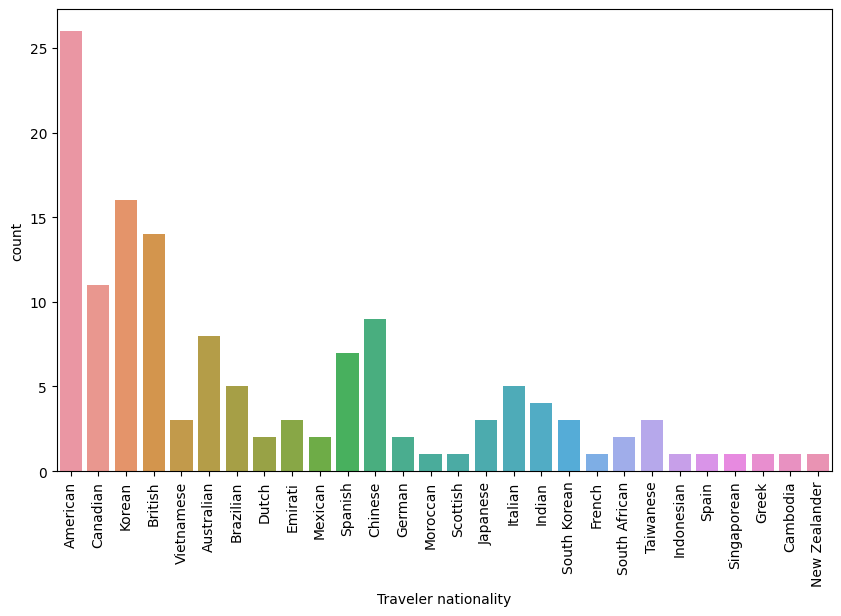

In [41]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x="Traveler nationality")
plt.xticks(rotation=90)

### Count for transportation type

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Flight'),
  Text(1, 0, 'Train'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Car rental'),
  Text(4, 0, 'Subway'),
  Text(5, 0, 'Car'),
  Text(6, 0, 'Ferry')])

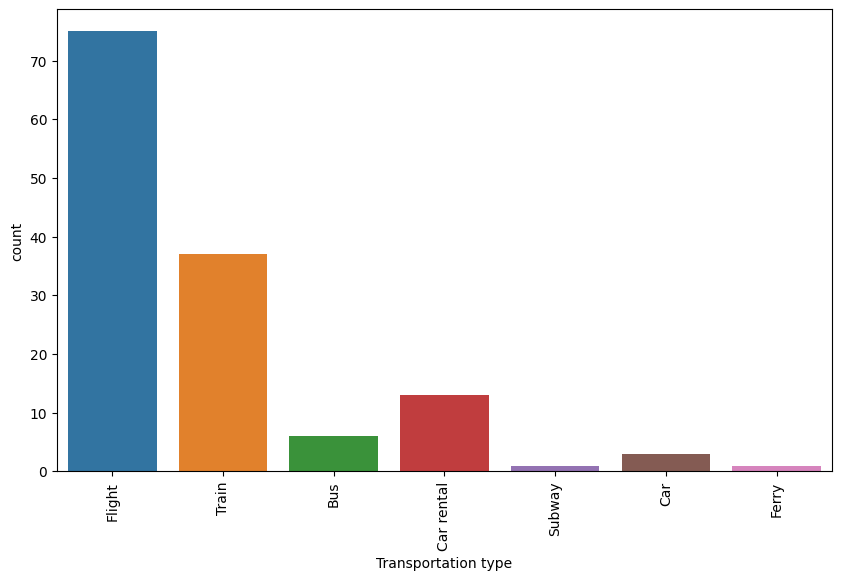

In [90]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x="Transportation type")
plt.xticks(rotation=90)

### Visualizing number of trips count by certain age group

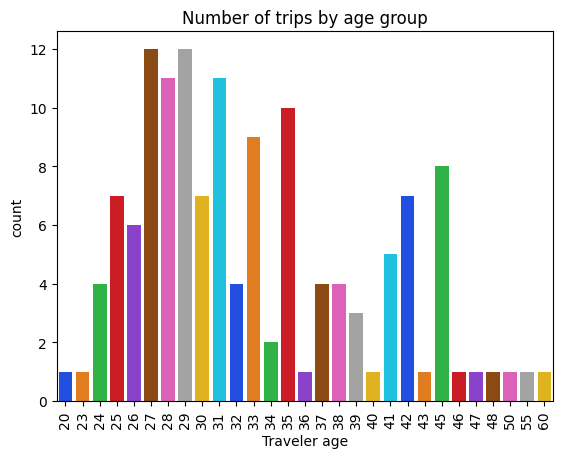

In [44]:
sns.countplot(data=df,x=df['Traveler age'],palette = 'bright')
plt.title('Number of trips by age group')
plt.xticks(rotation=90)
plt.show()

### Most traveled duration

In [45]:
duractions_count = df['Duration (days)'].value_counts().idxmax()

print('Most common travel duration is', duractions_count, 'days.')

Most common travel duration is 7 days.


### bar plot showing top visited country

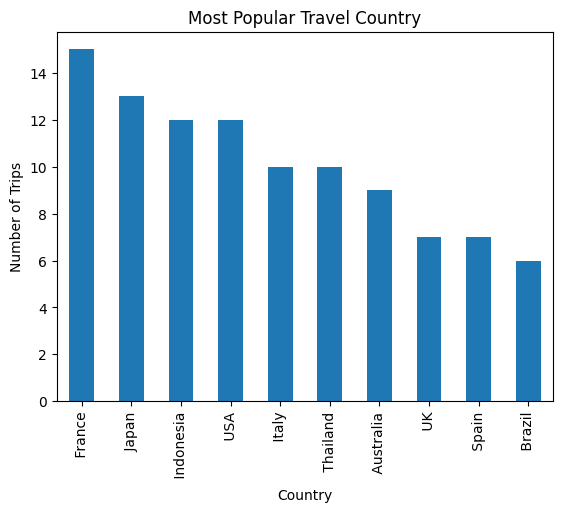

In [92]:
popular_destinations = df['Country'].value_counts()[:10]

popular_destinations.plot.bar()

plt.title('Most Popular Travel Country')
plt.xlabel('Country')
plt.ylabel('Number of Trips')

plt.show()

### top 10 country

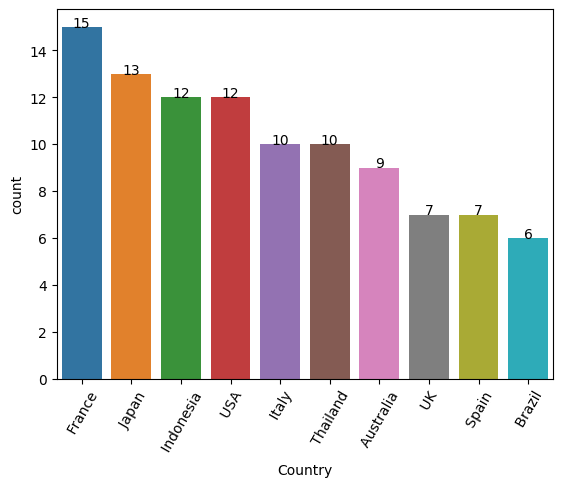

In [47]:
top10_country = df.Country.value_counts().reset_index().rename(columns={'index':'Country','Country':'count'}).head(10)
g = sns.barplot(data=top10_country,x='Country',y='count')
for v in top10_country.itertuples():
  g.text(x=v.Index,y=v.count,s=str(v.count), size=10, ha="center")
plt.xticks(rotation=60)
plt.show()

### Most popular City

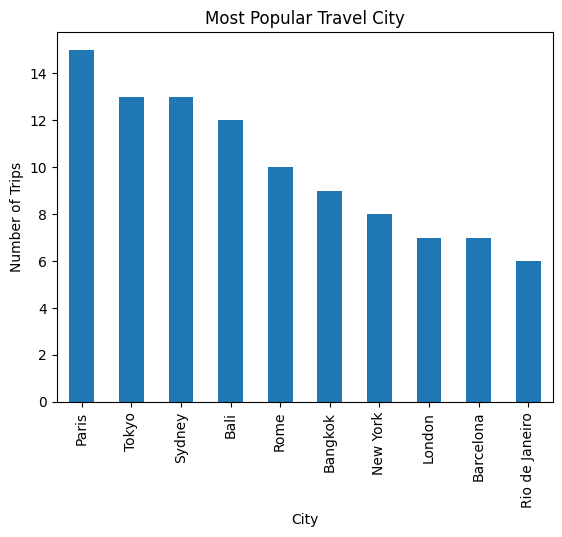

In [48]:
popular_cities = df['City'].value_counts()[:10]

popular_cities.plot.bar()

plt.title('Most Popular Travel City')
plt.xlabel('City')
plt.ylabel('Number of Trips')

plt.show()

### visualizing most prefered months

Text(0.5, 1.0, 'Most preferred months to Travel')

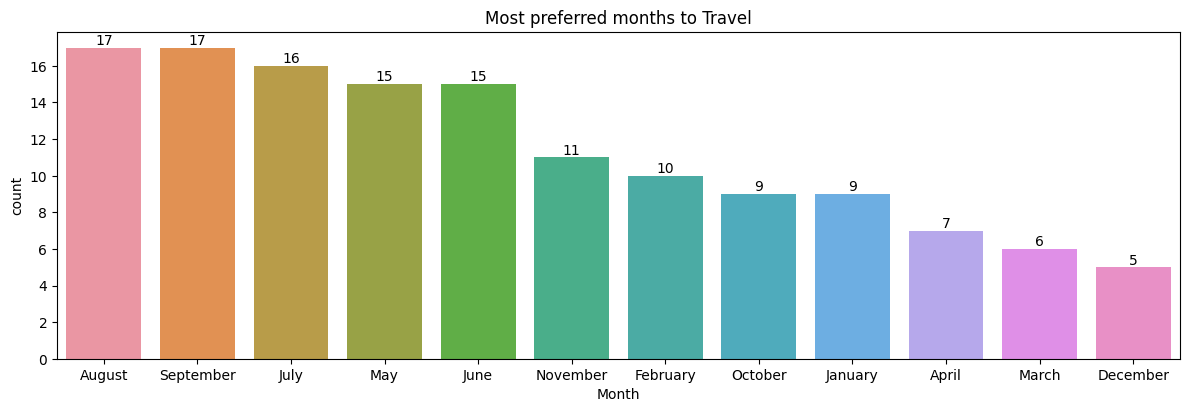

In [99]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x=df['Month'],
                   order=df['Month'].value_counts(ascending=False).index);

abs_values = df['Month'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.tight_layout()
plt.title('Most preferred months to Travel')

Text(0.5, 1.0, 'Most preferred months to Travel')

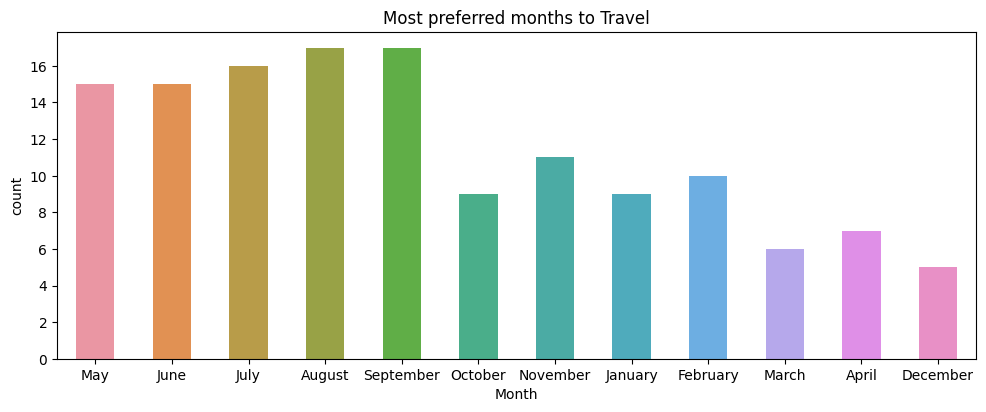

In [95]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Month',width=0.5)
plt.tight_layout()
plt.title('Most preferred months to Travel')

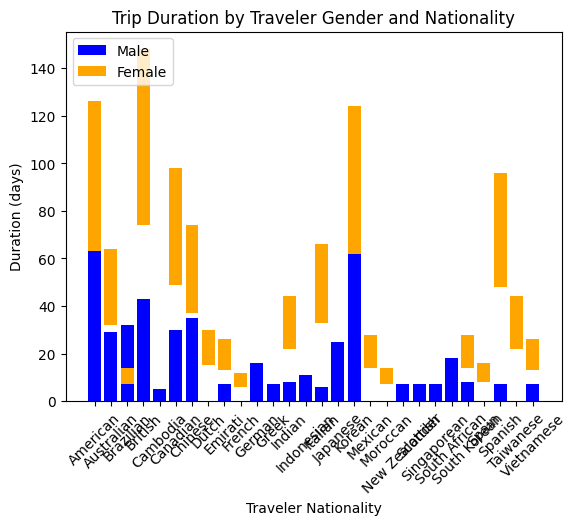

In [ ]:
grouped_df = df.groupby(['Traveler nationality', 'Traveler gender'])['Duration (days)'].sum().unstack()
genders = df['Traveler gender'].unique()
colors = ['blue', 'orange', 'green']

# Create the stacked bar plot
fig, ax = plt.subplots()

for i, gender in enumerate(genders):
    ax.bar(grouped_df.index, grouped_df[gender], bottom=grouped_df.iloc[:, :i].sum(axis=1), label=gender, color=colors[i])

# Set the title, x-axis label, and y-axis label
plt.title('Trip Duration by Traveler Gender and Nationality')
plt.xlabel('Traveler Nationality')
plt.ylabel('Duration (days)')

# Add a legend
plt.legend()

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Display the plot
plt.show()


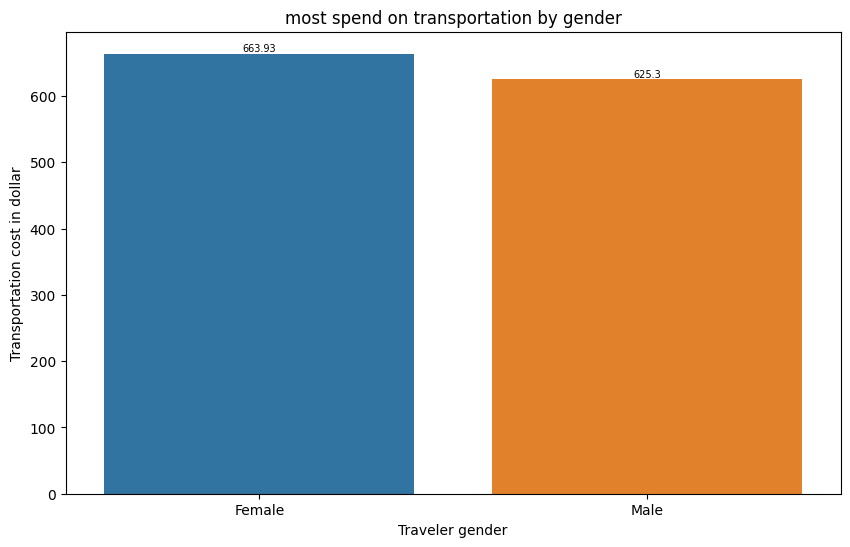

In [51]:
df['Transportation cost in dollar'] = pd.to_numeric(df['Transportation cost in dollar'], errors='coerce')
plt.figure(figsize=(10,6))
avg_age = df.groupby('Traveler gender')['Transportation cost in dollar'].mean().reset_index()
g = sns.barplot(data=avg_age, x='Traveler gender', y='Transportation cost in dollar')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=0)
plt.title('most spend on transportation by gender')
plt.show()

### Average age of the traveler by their nationality

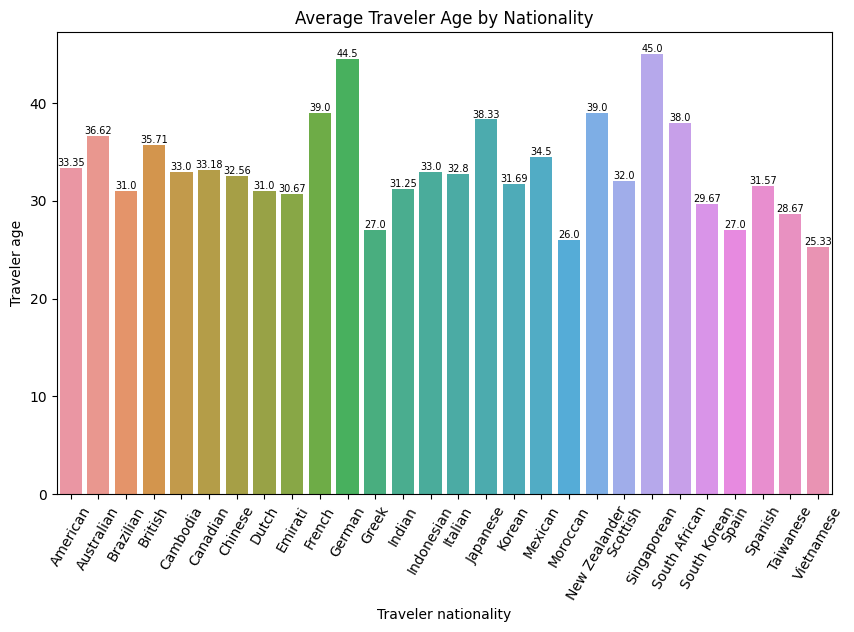

In [52]:
plt.figure(figsize=(10,6))
avg_age = df.groupby('Traveler nationality')['Traveler age'].mean().reset_index()
g = sns.barplot(data=avg_age, x='Traveler nationality', y='Traveler age')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=60)
plt.title('Average Traveler Age by Nationality')
plt.show()

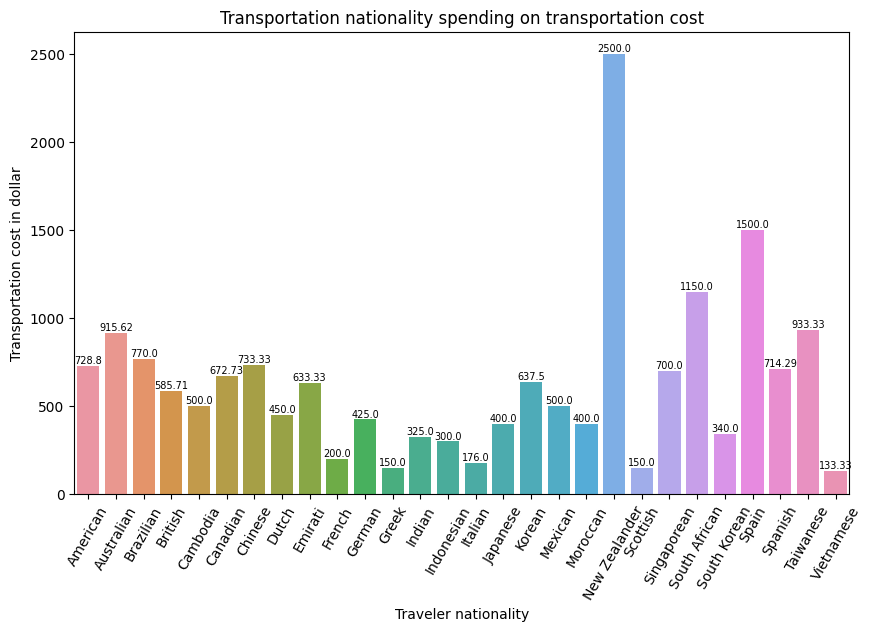

In [53]:
df['Transportation cost in dollar'] = pd.to_numeric(df['Transportation cost in dollar'], errors='coerce')
plt.figure(figsize=(10,6))
avg_age = df.groupby('Traveler nationality')['Transportation cost in dollar'].mean().reset_index()
g = sns.barplot(data=avg_age, x='Traveler nationality', y='Transportation cost in dollar')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=60)
plt.title('Transportation nationality spending on transportation cost')
plt.show()

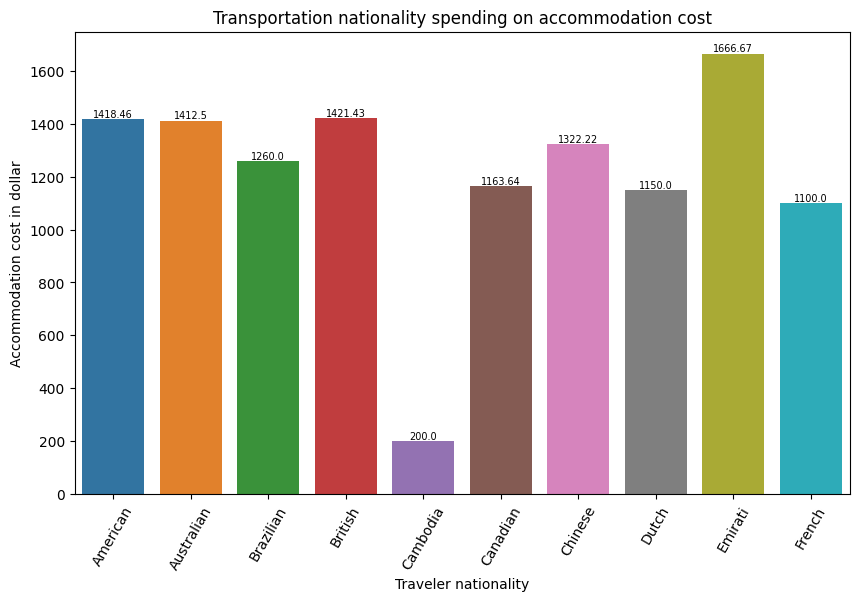

In [54]:
df['Accommodation cost in dollar'] = pd.to_numeric(df['Accommodation cost in dollar'], errors='coerce')
plt.figure(figsize=(10,6))
avg_age = df.groupby('Traveler nationality')['Accommodation cost in dollar'].mean().reset_index().head(10)
g = sns.barplot(data=avg_age, x='Traveler nationality', y='Accommodation cost in dollar')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=60)
plt.title('Transportation nationality spending on accommodation cost')
plt.show()

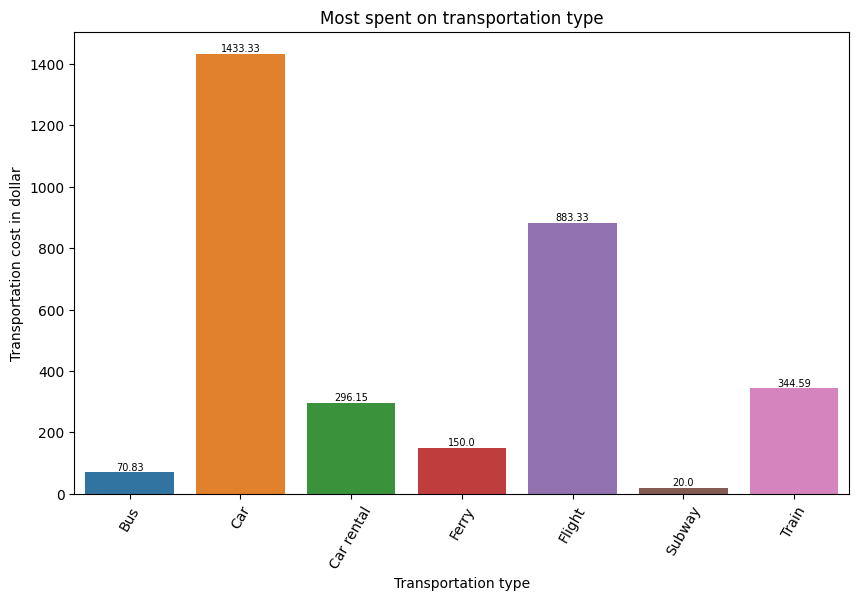

In [55]:
df['Transportation cost in dollar'] = pd.to_numeric(df['Transportation cost in dollar'], errors='coerce')
plt.figure(figsize=(10,6))
avg_age = df.groupby('Transportation type')['Transportation cost in dollar'].mean().reset_index()
g = sns.barplot(data=avg_age, x='Transportation type', y='Transportation cost in dollar')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=60)
plt.title('Most spent on transportation type')
plt.show()

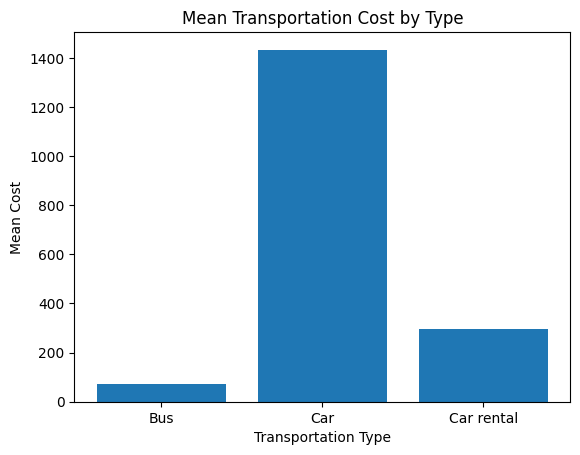

In [64]:
df['Transportation cost in dollar'] = pd.to_numeric(df['Transportation cost in dollar'], errors='coerce')
means = df.groupby('Transportation type')['Transportation cost in dollar'].mean().head(3)
accommodation_types = means.index
mean_costs = means.values
plt.bar(accommodation_types, mean_costs)
plt.xlabel('Transportation Type')
plt.ylabel('Mean Cost')
plt.title('Mean Transportation Cost by Type')
plt.show()

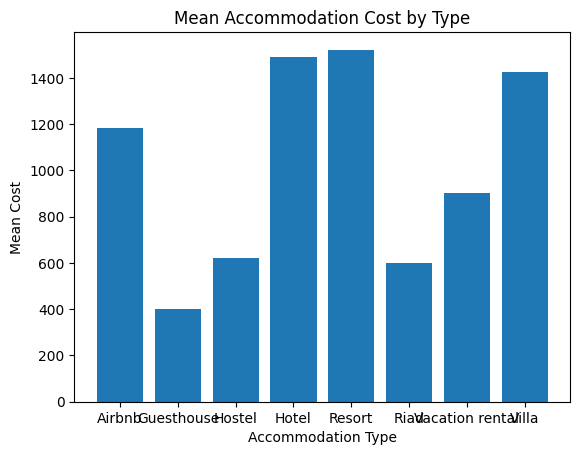

In [56]:
df['Accommodation cost in dollar'] = pd.to_numeric(df['Accommodation cost in dollar'], errors='coerce')
means = df.groupby('Accommodation type')['Accommodation cost in dollar'].mean()
accommodation_types = means.index
mean_costs = means.values
plt.bar(accommodation_types, mean_costs)
plt.xlabel('Accommodation Type')
plt.ylabel('Mean Cost')
plt.title('Mean Accommodation Cost by Type')
plt.show()

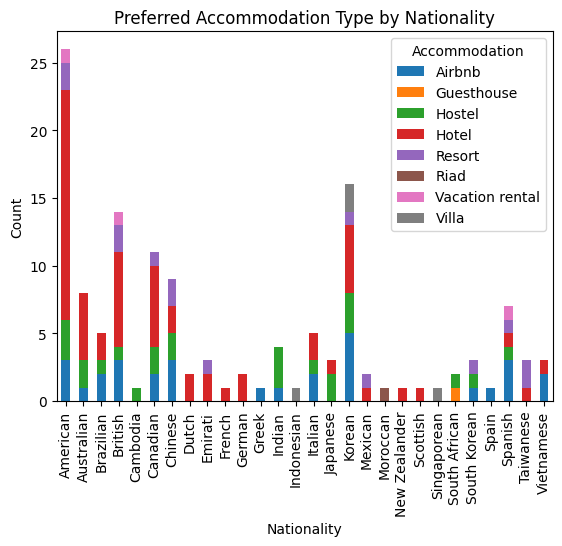

In [68]:
grouped_data = df.groupby(['Traveler nationality', 'Accommodation type']).size().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Preferred Accommodation Type by Nationality')
plt.legend(title='Accommodation')
plt.show()

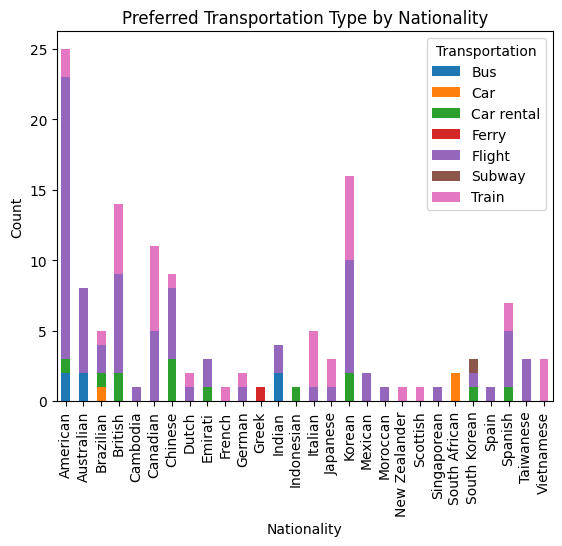

In [71]:
grouped_data = df.groupby(['Traveler nationality', 'Transportation type']).size().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Preferred Transportation Type by Nationality')
plt.legend(title='Transportation')
plt.show()

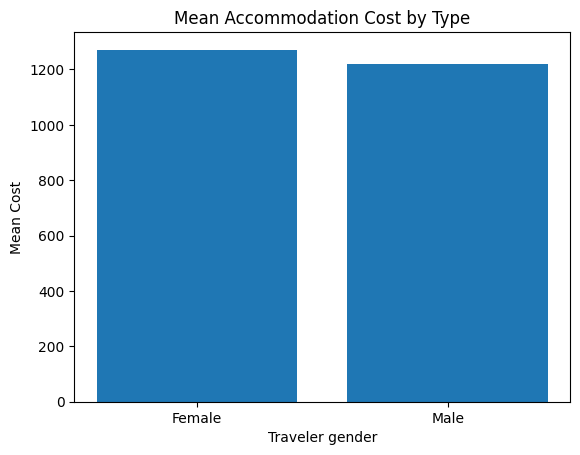

In [72]:
df['Accommodation cost in dollar'] = pd.to_numeric(df['Accommodation cost in dollar'], errors='coerce')
means = df.groupby('Traveler gender')['Accommodation cost in dollar'].mean()
accommodation_types = means.index
mean_costs = means.values
plt.bar(accommodation_types, mean_costs)
plt.xlabel('Traveler gender')
plt.ylabel('Mean Cost')
plt.title('Mean Accommodation Cost by Type')
plt.show()

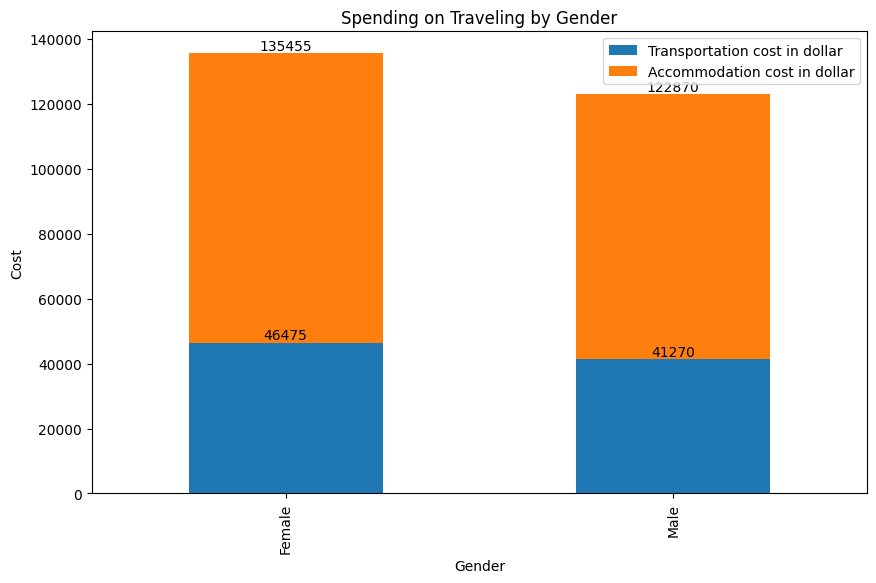

In [82]:

cost_data = df[['Transportation cost in dollar', 'Accommodation cost in dollar', 'Traveler gender']]
grouped_data = cost_data.groupby('Traveler gender').sum()
# Set the figure and axes size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Set the x-axis label
ax.set_xlabel('Gender')

# Set the y-axis label
ax.set_ylabel('Cost')

# Set the chart title
ax.set_title('Spending on Traveling by Gender')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)



# Show the plot
plt.show()

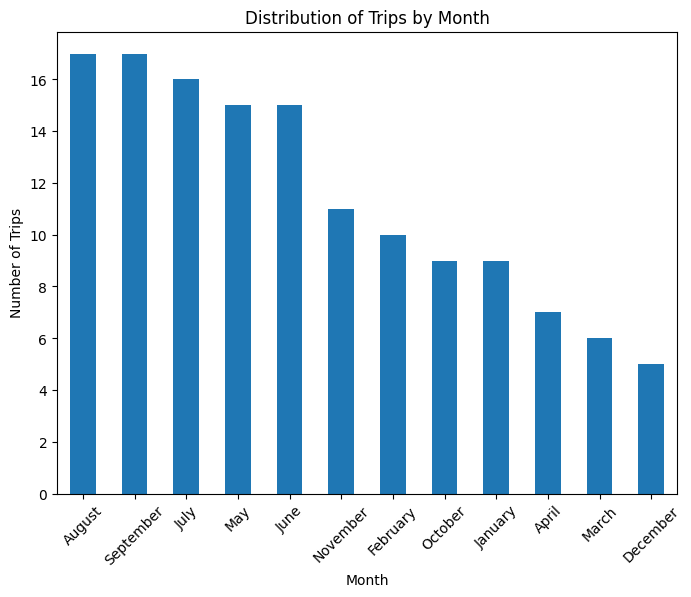

In [85]:
trips_by_month = df['Month'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
trips_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips by Month')
plt.xticks(rotation=45)
plt.show()

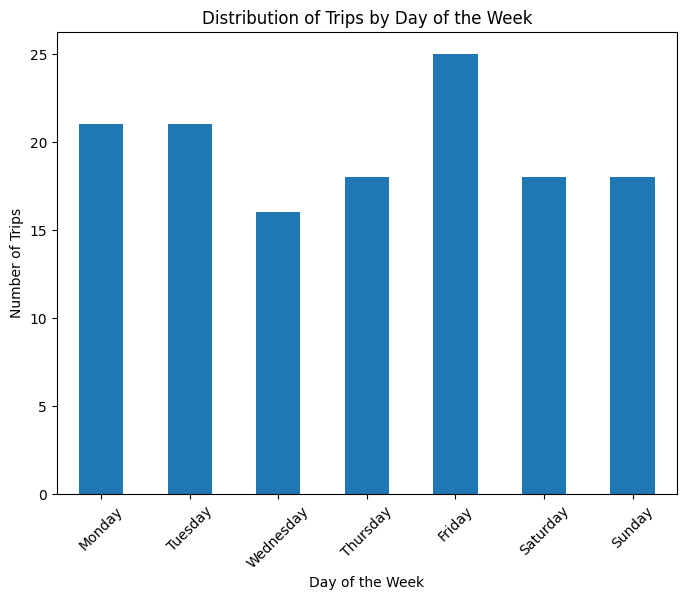

In [88]:
trips_by_day = df['Day of the week'].value_counts().sort_values(ascending=False).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(8, 6))
trips_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips by Day of the Week')
plt.xticks(rotation=45)
plt.show()

<ipython-input-43-d5318285598d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration (days)'])
<ipython-input-43-d5318285598d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Traveler age'])
<ipython-input-43-d5318285598d>:7: UserWarning: 

`distplot` is a deprecated function and w

<Axes: xlabel='Transportation cost in dollar', ylabel='Density'>

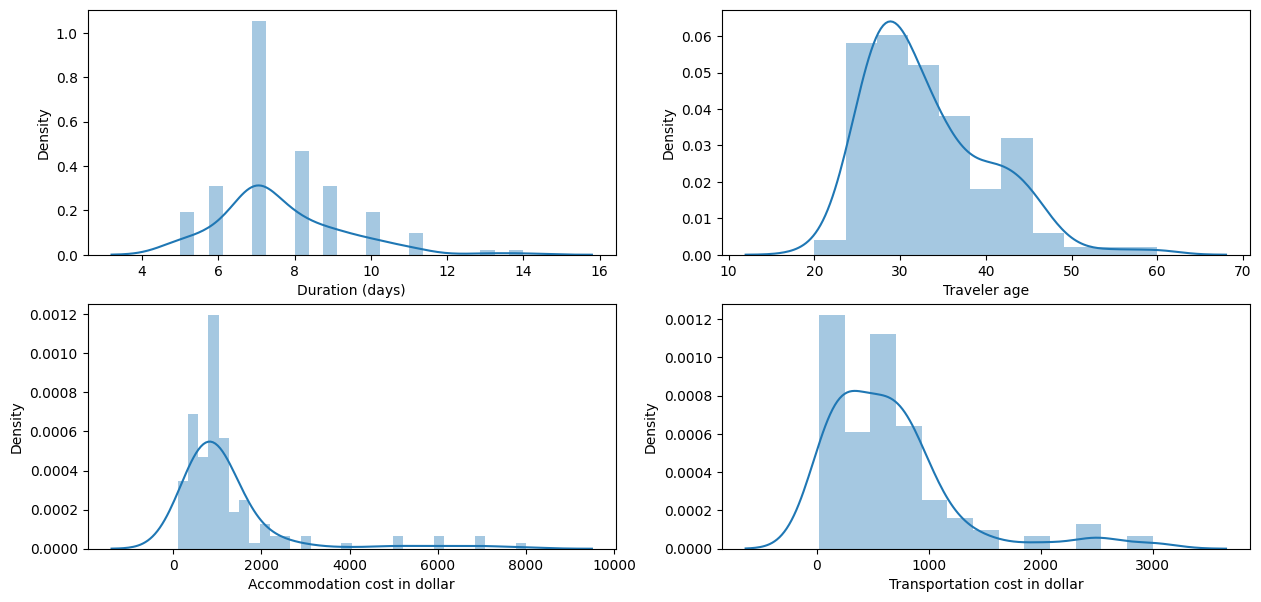

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(df['Duration (days)'])
plt.subplot(2,2,2)
sns.distplot(df['Traveler age'])
plt.subplot(2,2,3)
sns.distplot(df['Accommodation cost in dollar'])
plt.subplot(2,2,4)
sns.distplot(df['Transportation cost in dollar'])